
# EDA on Facebook Data

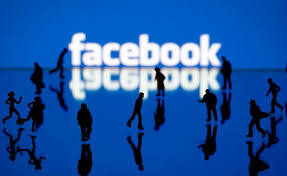

# Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  * 3.1 [Description of the Datasets](#section4)<br>
  * 3.2 [Pandas Profiling before Data Preprocessing](#section5)<br>
4. [Data Preprocessing](#section6)<br>
  * 4.1 [Check Missing Values](#section7)<br>
  * 4.2 [Pandas Profiling after Data Preprocessing](#section8)<br>
5. [Exploratory Data Analysis](#section9)<br>
  * 5.1 [Analysis based on Gender](#section10)<br>
      * 5.1.1 [Gender distribution of the sample](#section11)<br>
      * 5.1.2 [Friend Count distribution amongst Gender](#section12)<br>
      * 5.1.3 [Friendship Initiated distribution amongst Gender](#section13)<br>
      * 5.1.4 [Like distribution amongst Gender](#section14)<br>
      * 5.1.5 [Like Received distribution amongst Gender](#section15)<br>
      * 5.1.6 [Mobile Likes distribution amongst Gender](#section16)<br>
      * 5.1.7 [Mobile Likes Received distribution amongst Gender](#section17)<br>
      * 5.1.8 [Distribution of Likes through Facebook Webpage amongst Gender](#section18)<br>
      * 5.1.9 [Distribution of Likes received through Facebook Webpage amongst Gender](#section19)<br>
  * 5.2 [Analysis based on Age](#section20)<br>
      * 5.2.1 [Age distribution of the sample](#section21)<br>
      * 5.2.2 [Analysis based on Age and Gender](#section22)<br>
      * 5.2.3 [Analysis based on Age and Friend Count](#section23)<br>
      * 5.2.4 [Analysis based on Age and Friendship Initiated](#section24)<br>
      * 5.2.5 [Analysis based on Age and Likes](#section25)<br>
      * 5.2.6 [Analysis based on Age and Likes Received](#section26)<br>
      * 5.2.7 [Analysis based on Age and Likes given through Received](#section27)<br>
      * 5.2.8 [Analysis based on Age and Likes Received through Mobile](#section28)<br>
      * 5.2.9 [Analysis based on Age and Likes given through Facebook Webpage](#section29)<br>
      * 5.2.10 [Analysis based on Age and Likes Received through Facebook Webpage](#section30)<br>
  * 5.3 [Analysis based on Tenure](#section31)<br>
      * 5.3.1 [Tenure distribution of the sample](#section32)<br>
      * 5.3.2 [Analysis based on Tenure and Gender](#section33)<br>
      * 5.3.3 [Analysis based on Distribution of Users Age Group against Tenure](#section34)<br>
      * 5.3.4 [Analysis based on Distribution of Genderwise Age Group against Tenure](#section35)<br>
  * 5.4 [Analysis based on Age Group and Facebook Like given](#section36)<br>
  * 5.5 [Analysis based on Age Group and Like Received on Facebook](#section37)<br>
  * 5.6 [Distribution of Likes given as per Age](#section38)<br>
  * 5.7 [Distribution of Likes Received as per Age](#section39)<br>
  * 5.8 [Auto-correlation of variable](#section40)<br>
6. [Conclusion](#section41)<br>
7. [Actionable Insights](#section42)<br>

<a id=section1></a>
# 1. Problem Statement
Facebook has become quite popular in the recent few years with people all over the world using it as a medium to share their status,thoughts and pictures with their friends. With the mobile app , it has become even more popular and easier to access. People from all age groups are connected to facebook, however there are certain differences in their way of using it such as with respect to initiating friendships and sending likes . We are trying to study the dataset provided to identify certain patterns with respect to how the users are making use of this most popular social networking app depending on their age group,gender etc.

<a id=section2></a>
# 2. Importing Packages

In [ ]:
import numpy as np 

import pandas as pd
pd.set_option('mode.chained_assignment', None)                                    # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)                                       # To display all the data in each column
pd.set_option('display.max_columns', None)                                        # To display every column of the dataset in head()
pd.set_option('display.precision', 3)                                             # To display values only upto three decimal places.
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')                                                 # To suppress all the warnings in the notebook.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)                      # To apply seaborn styles to the plots.

from datetime import datetime, timedelta

In [ ]:
# To install pandas profiling please run this command.
!pip install pandas-profiling --upgrade
!pip uninstall !pip uninstall pandas_profiling
!pip install pandas_profiling[notebook,html]

     |████████████████████████████████| 266kB 2.6MB/s 
     |████████████████████████████████| 604kB 8.1MB/s 
     |████████████████████████████████| 3.1MB 13.8MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 71kB 4.8MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 296kB 33.4MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=57af1189a677b5bab99ad5f43479e0a32227041b86b97a1a483083ca7cdbe8be
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=2debd66313a816adc21ee12e5dc758c1ac6a3b48522a70561eda9743bcfe76a8
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

<a id=section3></a>
# 3. Loading Data

In [ ]:
facebook_df = pd.read_csv("https://github.com/insaid2018/Term-1/raw/master/Data/Projects/facebook_data.csv")
facebook_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.00,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.00,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.00,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.00,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.00,0,0,0,0,0,0,0,0


<a id=section4></a>
## 3.1 Description of the Datasets
This dataset provides a **usage analysis** of various facebook users such as the tenure of their account,number of friends they have,number of friendships they have initiated , the number of likes received by them through the FB website and through the mobile app .

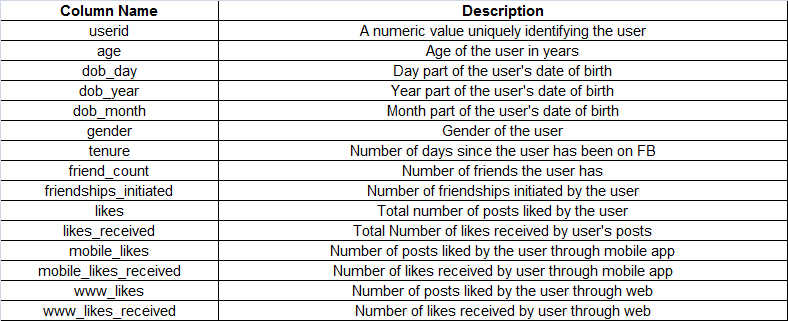



In [ ]:
facebook_df.shape

(99003, 15)

In [ ]:
facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

`info` function gives us the following insights into the df_merge dataframe:

* There are a total of **99003 samples (rows)** and **15 columns** in the dataframe.

* There are **14 columns** with a **numeric** datatype and **1 columns** with an **object** datatype.

* There are **missing** values in the **gender** and **tenure** column.

In [ ]:
facebook_df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99003.00,99003.00,99003.00,99003.00,99003.00,99001.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00
mean,1597045.21,37.28,14.53,1975.72,6.28,537.89,196.35,107.45,156.08,142.69,106.12,84.12,49.96,58.57
std,344059.18,22.59,9.02,22.59,3.53,457.65,387.30,188.79,572.28,1387.92,445.25,839.89,285.56,601.42
min,1000008.00,13.00,1.00,1900.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1298805.50,20.00,7.00,1963.00,3.00,226.00,31.00,17.00,1.00,1.00,0.00,0.00,0.00,0.00
50%,1596148.00,28.00,14.00,1985.00,6.00,412.00,82.00,46.00,11.00,8.00,4.00,4.00,0.00,2.00
75%,1895744.00,50.00,22.00,1993.00,9.00,675.00,206.00,117.00,81.00,59.00,46.00,33.00,7.00,20.00
max,2193542.00,113.00,31.00,2000.00,12.00,3139.00,4923.00,4144.00,25111.00,261197.00,25111.00,138561.00,14865.00,129953.00


<a id=section5></a>
## 3.2 Pandas Profiling before Data Preprocessing
* Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as **profiling_before_preprocessing.html**.
* The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it.
* Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below.

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(facebook_df,title="Pandas Profiling before Data Preprocessing", html={'style':{'full_width':True}},sort="None")

In [ ]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = pandas_profiling.ProfileReport(facebook_df)
profile.to_notebook_iframe()
profile.to_file(output_file="profiling_before_preprocessing.html")


# To output the pandas profiling report on the notebook.

# facebook_df.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

Output hidden; open in https://colab.research.google.com to view.

**Observations from Pandas Profiling before Data Processing Dataset info:**

* Number of variables: 15
* Number of observations: 99003
* Missing cells: 177 which is < 0.1%

**Variables types:**
* Numeric = 14
* Categorical = 1
* There are no Unsupported value.
* There are no Duplicate rows.
* **userid** has unique values.


<a id=section6></a>
# 4. Data Preprocessing

<a id=section7></a>
## 4.1 Check Missing Values
We will start by checking the missing values

In [ ]:
facebook_df.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

* Only two variables **gender** and **tenure** has missing values.

In [ ]:
facebook_df[facebook_df.gender.isnull()].head(10)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
3224,1781137,25,3,1988,1,NaN,203.00,1,1,1,0,1,0,0,0
4123,1110111,31,12,1982,1,NaN,227.00,2,2,0,0,0,0,0,0
5920,2000185,25,15,1988,2,NaN,239.00,4,4,0,0,0,0,0,0
6432,1137054,59,18,1954,2,NaN,2076.00,4,0,23,5,23,4,0,1
6870,1783336,62,5,1951,9,NaN,2047.00,5,0,0,1,0,1,0,0
6886,1280036,67,2,1946,7,NaN,2056.00,5,2,0,0,0,0,0,0
7130,2185523,108,6,1905,6,NaN,1517.00,5,2,6,15,0,4,6,11
7242,1117499,90,2,1923,11,NaN,1960.00,5,4,33,12,2,0,31,12
7555,1098347,27,19,1986,4,NaN,1150.00,7,2,0,0,0,0,0,0
10093,1020617,85,7,1928,8,NaN,2222.00,9,1,1,1,0,0,1,1


In [ ]:
facebook_df[facebook_df.tenure.isnull()]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
35057,1414063,88,14,1925,12,female,nan,48,41,18,5,17,3,1,2
63979,2095829,103,1,1910,1,female,nan,137,52,110,74,0,21,110,53


In [ ]:
facebook_df.dropna(subset = ['tenure'], inplace = True)

In [ ]:
facebook_df.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     0
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [ ]:
facebook_df.dropna(subset = ['gender'], inplace = True)

In [ ]:
facebook_df.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

* Now, we don't have any missing values in the dataset to deal with.

<a id=section8></a>
## 4.2 Pandas Profiling after Data Preprocessing

* Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the output file as **profiling_after_preprocessing.html**.

In [ ]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_after_preprocessing.html

profile = pandas_profiling.ProfileReport(facebook_df)
profile.to_file(output_file="profiling_after_preprocessing.html")


# To output the pandas profiling report on the notebook.

# facebook_df.profile_report(title='Pandas Profiling after Data Preprocessing', style={'full_width':True})

<a id=section9></a> 
# 5. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting, parsimonious model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>

<a id=section10></a>
## 5.1 Analysis based on Gender

In [ ]:
facebook_df['gender'].value_counts()

male      58574
female    40252
Name: gender, dtype: int64

<a id=section11></a>
#### 5.1.1 Gender distribution of the sample

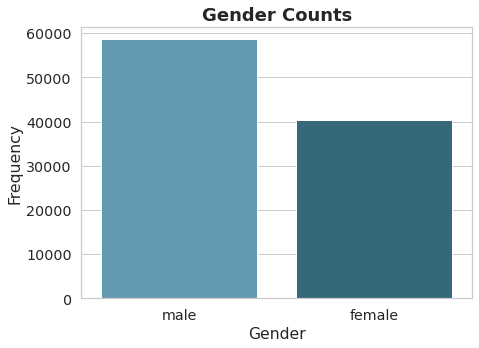

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot('gender',data = facebook_df, order = facebook_df['gender'].value_counts().index, palette="PuBuGn_d")
plt.title("Gender Counts",fontsize=18,fontweight="bold")
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

**Majority of the users are male**

Text(0.5, 1.0, 'Distribution of users')

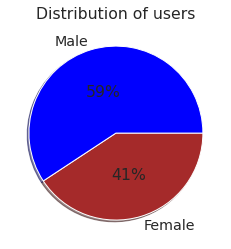

In [ ]:
temp = facebook_df.groupby('gender').count()
plt.pie(temp['age'], labels=['Female', 'Male'], colors=('brown', 'blue'), autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1, counterclock=False, shadow=True)
plt.title('Distribution of users')

**It's a 60:40 ratio between male and female users respectively**

<a id=section12></a>
#### 5.1.2 Friend Count distribution amongst Gender

Text(0, 0.5, 'Friends Count')

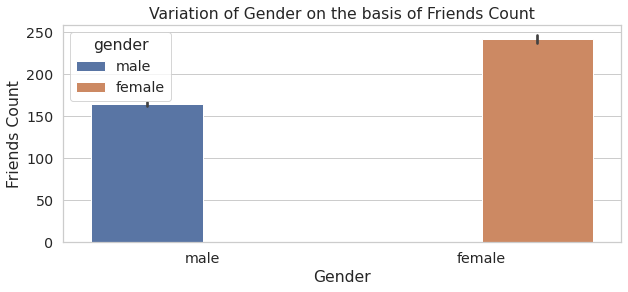

In [ ]:
fig,ax =plt.subplots(figsize=(10,4))
sns.barplot(x=facebook_df['gender'],y=facebook_df['friend_count'], hue=facebook_df.gender)
plt.title('Variation of Gender on the basis of Friends Count')
plt.xlabel('Gender')
plt.ylabel('Friends Count')

**Females have more friend count than males**

<a id=section13></a>
#### 5.1.3 Friendship Initiated distribution amongst Gender

Text(0, 0.5, 'Friendship Initiated')

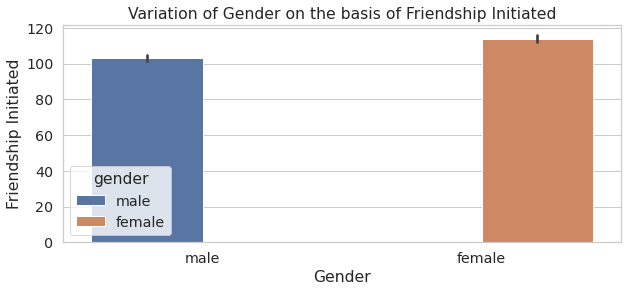

In [ ]:
fig,ax =plt.subplots(figsize=(10,4))
sns.barplot(x=facebook_df['gender'],y=facebook_df['friendships_initiated'],hue=facebook_df.gender)
plt.title('Variation of Gender on the basis of Friendship Initiated')
plt.xlabel('Gender')
plt.ylabel('Friendship Initiated')

**Females have initiated more friend requests than males**

<a id=section14></a>
#### 5.1.4 Likes distribution amongst Gender

Text(0, 0.5, 'Likes Given')

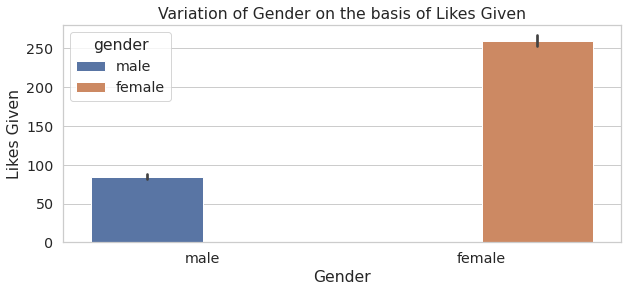

In [ ]:
fig,ax =plt.subplots(figsize=(10,4))
sns.barplot(x=facebook_df['gender'],y=facebook_df['likes'],hue=facebook_df.gender)
plt.title('Variation of Gender on the basis of Likes Given')
plt.xlabel('Gender')
plt.ylabel('Likes Given')

**Female users have given more likes than males**

<a id=section15></a>
#### 5.1.5 Likes Received distribution amongst Gender

Text(0, 0.5, 'Likes Received')

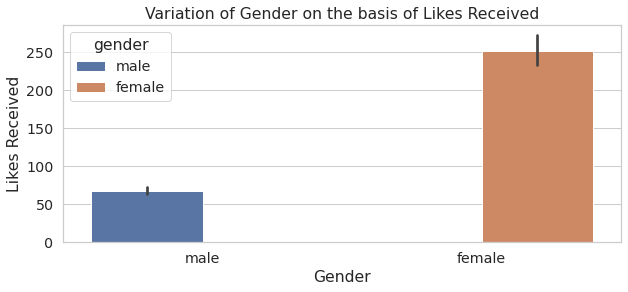

In [ ]:
fig,ax =plt.subplots(figsize=(10,4))
sns.barplot(x=facebook_df['gender'],y=facebook_df['likes_received'],hue=facebook_df.gender)
plt.title('Variation of Gender on the basis of Likes Received')
plt.xlabel('Gender')
plt.ylabel('Likes Received')

**Female users have received more likes than male users**

<a id=section16></a>
#### 5.1.6 Mobile Likes distribution amongst Gender

Text(0, 0.5, 'Mobile Likes Given')

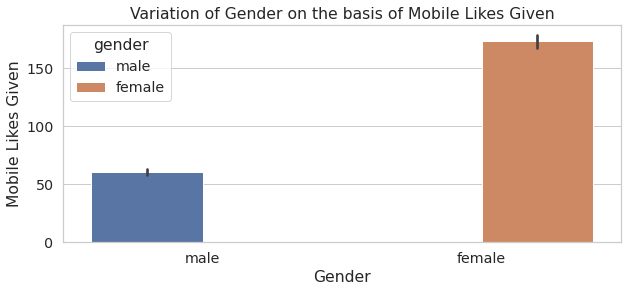

In [ ]:
fig,ax =plt.subplots(figsize=(10,4))
sns.barplot(x=facebook_df['gender'],y=facebook_df['mobile_likes'],hue=facebook_df.gender)
plt.title('Variation of Gender on the basis of Mobile Likes Given')
plt.xlabel('Gender')
plt.ylabel('Mobile Likes Given')

**Female users have given more likes through mobile than in comparision to male users**

<a id=section17></a>
#### 5.1.7 Mobile Likes Received distribution amongst Gender

Text(0, 0.5, 'Mobile Likes Received')

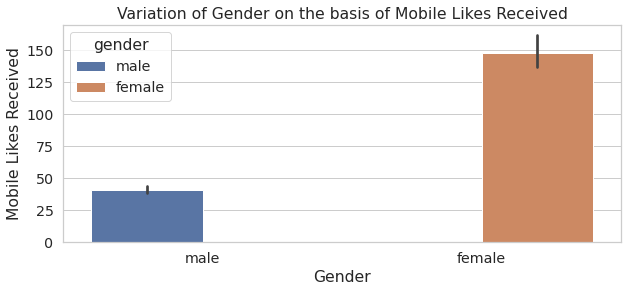

In [ ]:
fig,ax =plt.subplots(figsize=(10,4))
sns.barplot(x=facebook_df['gender'],y=facebook_df['mobile_likes_received'],hue=facebook_df.gender)
plt.title('Variation of Gender on the basis of Mobile Likes Received')
plt.xlabel('Gender')
plt.ylabel('Mobile Likes Received')

**Female users have received more mobile likes than male users** 

<a id=section18></a>
#### 5.1.8 Distribution of Likes through Facebook Webpage amongst Gender

Text(0, 0.5, 'Likes Given through Webpage')

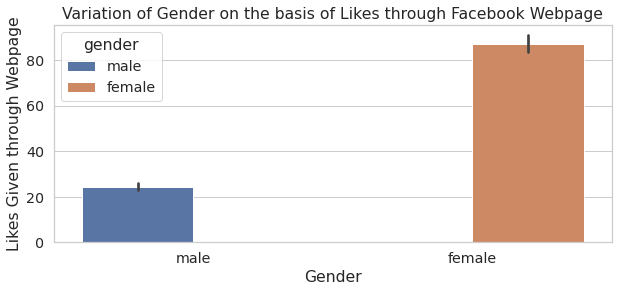

In [ ]:
fig,ax =plt.subplots(figsize=(10,4))
sns.barplot(x=facebook_df['gender'],y=facebook_df['www_likes'],hue=facebook_df.gender)
plt.title('Variation of Gender on the basis of Likes through Facebook Webpage')
plt.xlabel('Gender')
plt.ylabel('Likes Given through Webpage')

**Female users have given more likes through webpage**

<a id=section19></a>
#### 5.1.9 Distribution of Likes received through Facebook Webpage amongst Gender

Text(0, 0.5, 'Likes Received through Webpage')

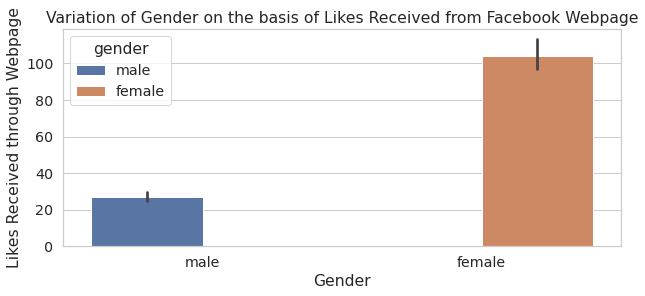

In [ ]:
fig,ax =plt.subplots(figsize=(10,4))
sns.barplot(x=facebook_df['gender'],y=facebook_df['www_likes_received'],hue=facebook_df.gender)
plt.title('Variation of Gender on the basis of Likes Received from Facebook Webpage')
plt.xlabel('Gender')
plt.ylabel('Likes Received through Webpage')

**Female users have received more likes through webpage**

<a id=section20></a>
## 5.2 Analysis based on Age

In [ ]:
facebook_df.age.describe()

count   98826.00
mean       37.21
std        22.52
min        13.00
25%        20.00
50%        28.00
75%        50.00
max       113.00
Name: age, dtype: float64

### Divided the age into a group of 10

In [ ]:
labels=['13-19','20-35','36-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
facebook_df['age_group'] = pd.cut(facebook_df.age,bins=np.arange(13,121,10),labels=labels,right=True)
facebook_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.00,0,0,0,0,0,0,0,0,13-19
1,1192601,14,2,1999,11,female,6.00,0,0,0,0,0,0,0,0,13-19
2,2083884,14,16,1999,11,male,13.00,0,0,0,0,0,0,0,0,13-19
3,1203168,14,25,1999,12,female,93.00,0,0,0,0,0,0,0,0,13-19
4,1733186,14,4,1999,12,male,82.00,0,0,0,0,0,0,0,0,13-19


### Counting value in age groups

In [ ]:
facebook_df.age_group.value_counts()

13-19      35367
20-35      22664
36-50      10051
51-60       9417
61-70       8603
71-80       5337
111-120     2265
101-110     2250
81-90       1593
91-100       795
Name: age_group, dtype: int64

<a id=section21></a>
### 5.2.1 Age distribution of the sample

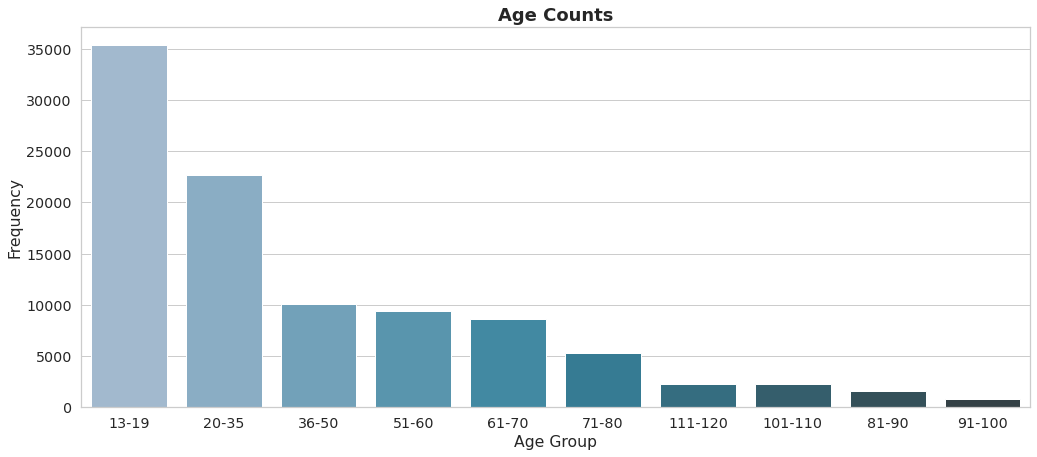

In [ ]:
plt.figure(figsize=(17,7))
sns.countplot('age_group',data = facebook_df, order = facebook_df['age_group'].value_counts().index,palette="PuBuGn_d")
plt.title("Age Counts",fontsize=18,fontweight="bold")
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

**Age group of 13 to 19 years have maximum users**

<a id=section22></a>
### 5.2.2 Analysis based on Age and Gender

Text(0.5, 1.0, 'Distribution of Age Group on the basis of Gender and User Count')

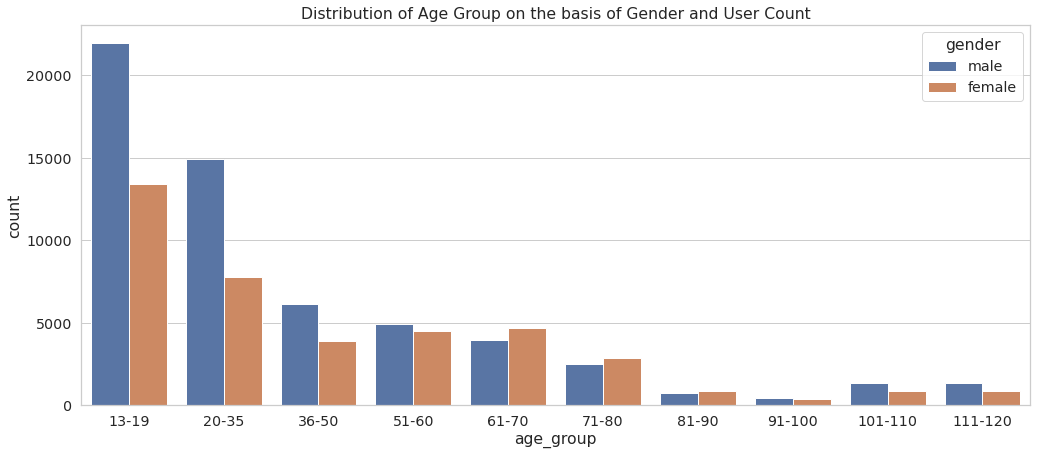

In [ ]:
fig,ax =plt.subplots(figsize=(17,7))
sns.countplot(data = facebook_df,x = 'age_group', hue='gender')
plt.title('Distribution of Age Group on the basis of Gender and User Count')


**Male users more than female users till the age of 60 years. More female users have been observed from the age of 61 to 90 years**

<a id=section23></a>
### 5.2.3 Analysis based on Age and Friend Count

Text(0, 0.5, 'Friend Count')

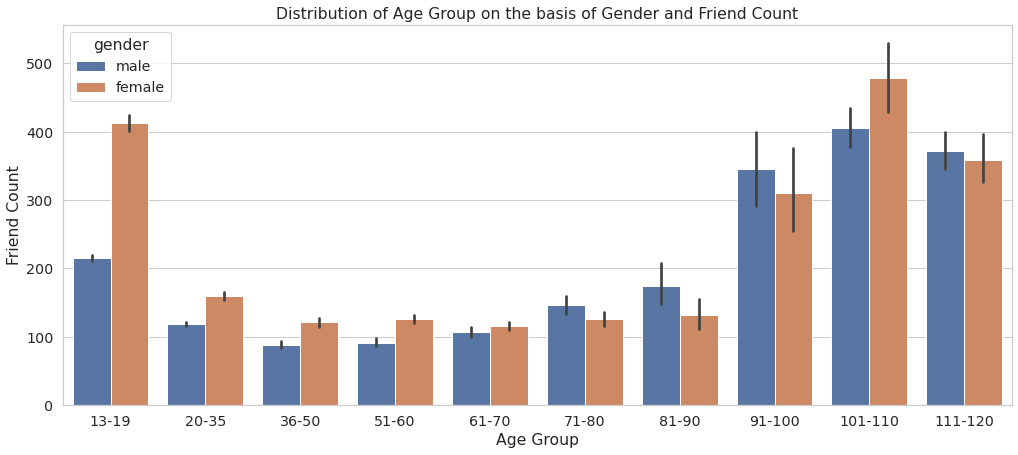

In [ ]:
fig,ax =plt.subplots(figsize=(17,7))
sns.barplot(x=facebook_df['age_group'],y=facebook_df['friend_count'],hue=facebook_df.gender)
plt.title('Distribution of Age Group on the basis of Gender and Friend Count')
plt.xlabel('Age Group')
plt.ylabel('Friend Count')

**Friend count request is high in the age group up to 19 years and between 91 to 120 years.**

<a id=section24></a>
### 5.2.4 Analysis based on Age and Friendship Initiated

Text(0, 0.5, 'Friendship Initiated')

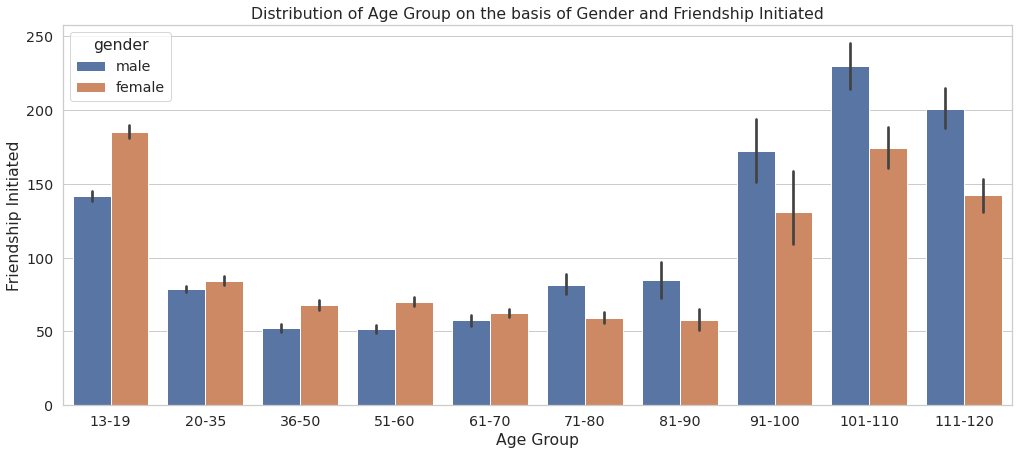

In [ ]:
fig,ax =plt.subplots(figsize=(17,7))
sns.barplot(x=facebook_df['age_group'],y=facebook_df['friendships_initiated'],hue=facebook_df.gender)
plt.title('Distribution of Age Group on the basis of Gender and Friendship Initiated')
plt.xlabel('Age Group')
plt.ylabel('Friendship Initiated')

**Friendship initiation request is high in the age group up to 19 years and between 91 to 120 years.**

<a id=section25></a>
### 5.2.5 Analysis based on Age and Likes


Text(0, 0.5, 'Likes Given')

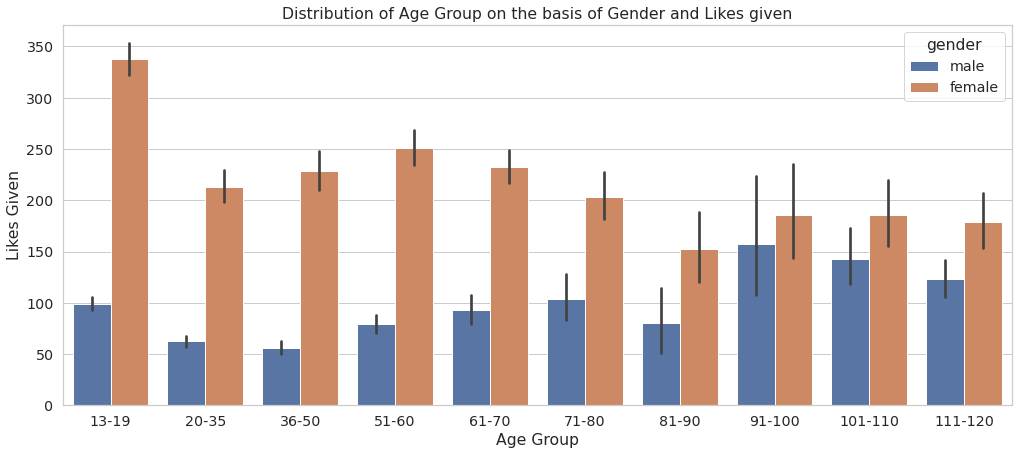

In [ ]:
fig,ax =plt.subplots(figsize=(17,7))
sns.barplot(x=facebook_df['age_group'],y=facebook_df['likes'],hue=facebook_df.gender)
plt.title('Distribution of Age Group on the basis of Gender and Likes given')
plt.xlabel('Age Group')
plt.ylabel('Likes Given')

**Majority of likes given is highest amongst the teenagers.
Likes given were almost same for the female users of age group between 20 to 60 years.**

<a id=section26></a>
### 5.2.6 Analysis based on Age and Likes Received

Text(0, 0.5, 'Likes Received')

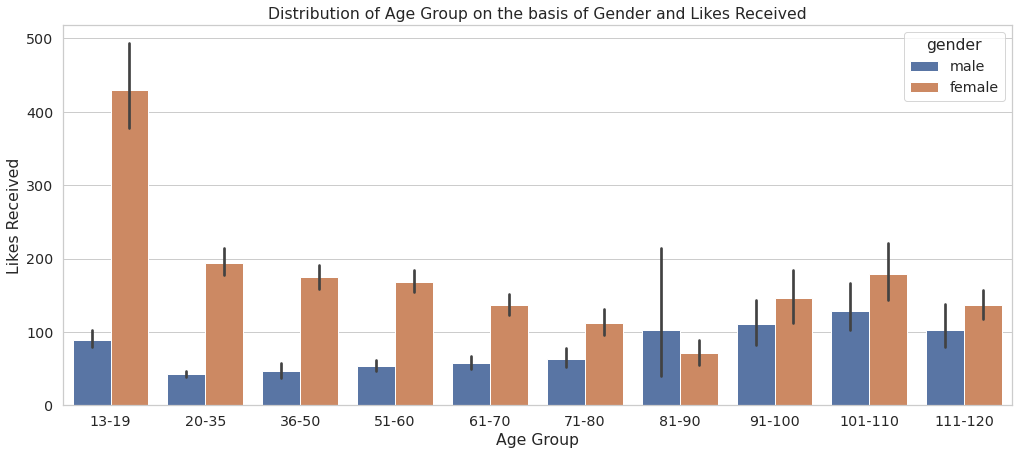

In [ ]:
fig,ax =plt.subplots(figsize=(17,7))
sns.barplot(x=facebook_df['age_group'],y=facebook_df['likes_received'],hue=facebook_df.gender)
plt.title('Distribution of Age Group on the basis of Gender and Likes Received')
plt.xlabel('Age Group')
plt.ylabel('Likes Received')

**Majority of likes received is highest amongst the teenagers.**

<a id=section27></a>
### 5.2.7 Analysis based on Age and Likes given through Mobile

Text(0, 0.5, 'Mobile Likes Given')

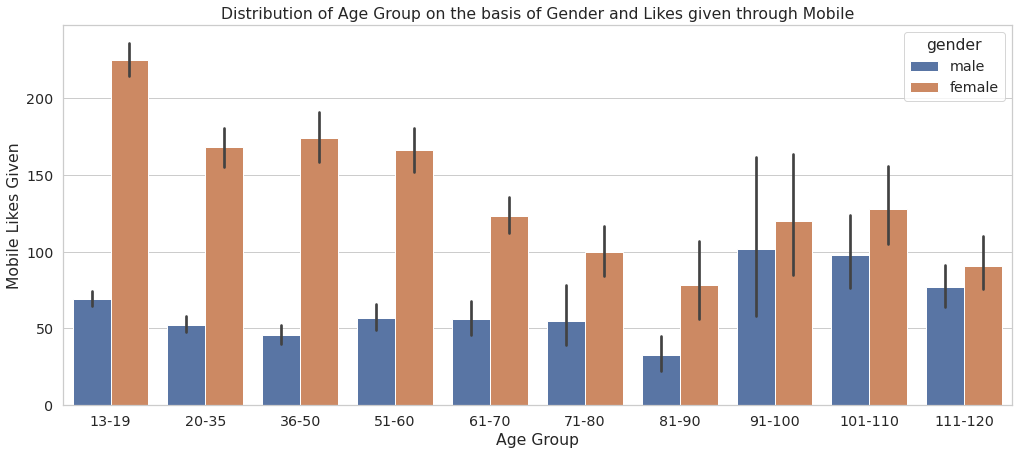

In [ ]:
fig,ax =plt.subplots(figsize=(17,7))
sns.barplot(x=facebook_df['age_group'],y=facebook_df['mobile_likes'],hue=facebook_df.gender)
plt.title('Distribution of Age Group on the basis of Gender and Likes given through Mobile')
plt.xlabel('Age Group')
plt.ylabel('Mobile Likes Given')

<a id=section28></a>
### 5.2.8 Analysis based on Age and Likes Received through Mobile

Text(0, 0.5, 'Mobile Likes Received')

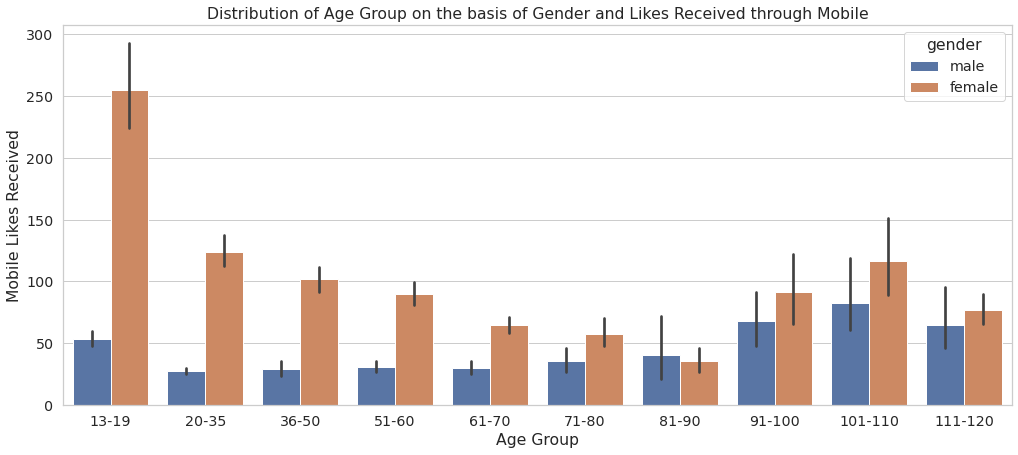

In [ ]:
fig,ax =plt.subplots(figsize=(17,7))
sns.barplot(x=facebook_df['age_group'],y=facebook_df['mobile_likes_received'],hue=facebook_df.gender)
plt.title('Distribution of Age Group on the basis of Gender and Likes Received through Mobile')
plt.xlabel('Age Group')
plt.ylabel('Mobile Likes Received')

**Majority of mobile likes received is highest amongst the teenagers.**

<a id=section29></a>
### 5.2.9 Analysis based on Age and Likes given through Facebook Webpage

Text(0, 0.5, 'Likes Given through Webpage')

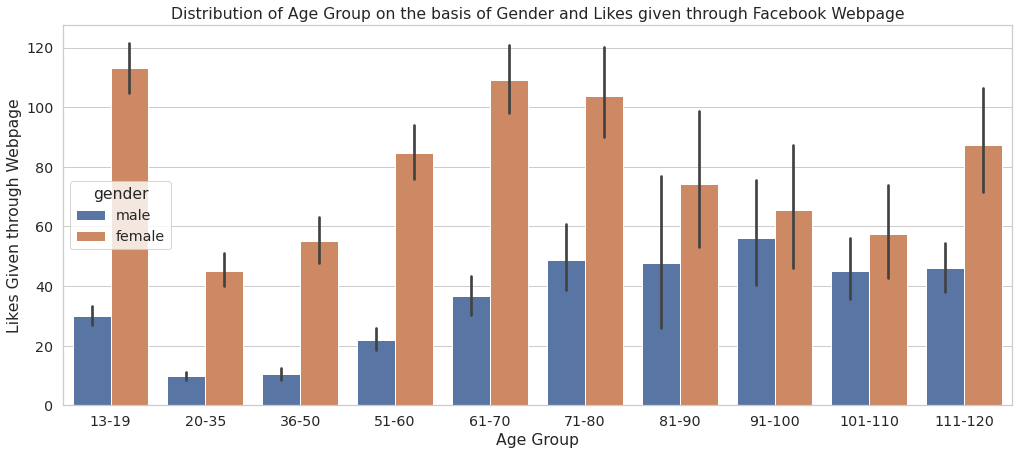

In [ ]:
fig,ax =plt.subplots(figsize=(17,7))
sns.barplot(x=facebook_df['age_group'],y=facebook_df['www_likes'],hue=facebook_df.gender)
plt.title('Distribution of Age Group on the basis of Gender and Likes given through Facebook Webpage')
plt.xlabel('Age Group')
plt.ylabel('Likes Given through Webpage')

**Utilisation of likes through webpage in males has an increasing trend between 20 to 100 years whereas for females it is between 20 to 70 years**

<a id=section30></a>
### 5.2.10 Analysis based on Age and Likes Received through Facebook Webpage

Text(0, 0.5, 'Likes Received through Webpage')

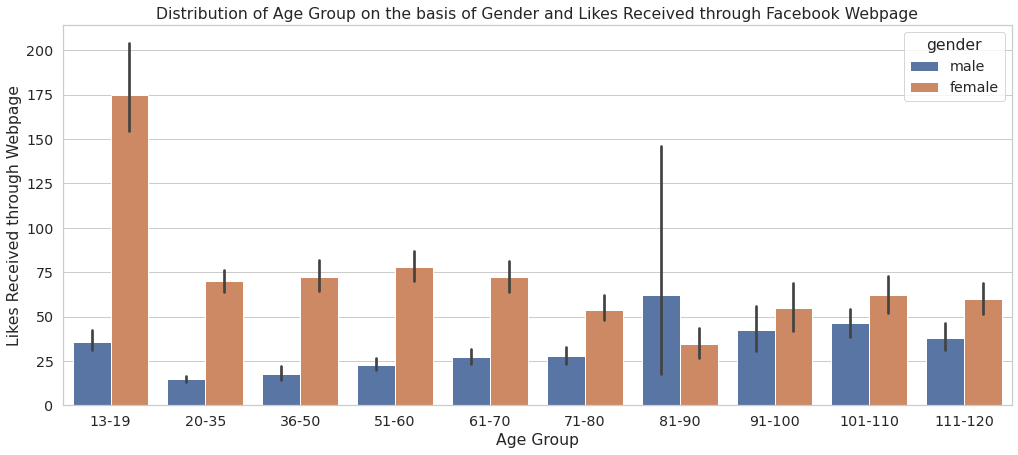

In [ ]:
fig,ax =plt.subplots(figsize=(17,7))
sns.barplot(x=facebook_df['age_group'],y=facebook_df['www_likes_received'],hue=facebook_df.gender)
plt.title('Distribution of Age Group on the basis of Gender and Likes Received through Facebook Webpage')
plt.xlabel('Age Group')
plt.ylabel('Likes Received through Webpage')

<a id=section31></a>
## 5.3 Analysis based on Tenure

In [ ]:
facebook_df.tenure.describe()

count   98826.00
mean      535.65
std       454.26
min         0.00
25%       226.00
50%       412.00
75%       673.00
max      3139.00
Name: tenure, dtype: float64

####Divided the tenure into a group of 10

In [ ]:
tenurelabel=['0-1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-6 years','6-7 years','7-8 years','8-9 years']
facebook_df['year_group']=pd.cut(facebook_df.tenure,bins=np.arange(0,3300,365),labels=tenurelabel,right=True)
facebook_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group
0,2094382,14,19,1999,11,male,266.00,0,0,0,0,0,0,0,0,13-19,0-1 year
1,1192601,14,2,1999,11,female,6.00,0,0,0,0,0,0,0,0,13-19,0-1 year
2,2083884,14,16,1999,11,male,13.00,0,0,0,0,0,0,0,0,13-19,0-1 year
3,1203168,14,25,1999,12,female,93.00,0,0,0,0,0,0,0,0,13-19,0-1 year
4,1733186,14,4,1999,12,male,82.00,0,0,0,0,0,0,0,0,13-19,0-1 year


####Counting value in Year Groups

In [ ]:
facebook_df.year_group.value_counts()

0-1 year     43572
1-2 years    33366
2-3 years     9856
3-4 years     5436
4-5 years     4532
5-6 years     1432
6-7 years      539
7-8 years       14
8-9 years        9
Name: year_group, dtype: int64

<a id=section32></a>
#### 5.3.1 Tenure distribution of the sample

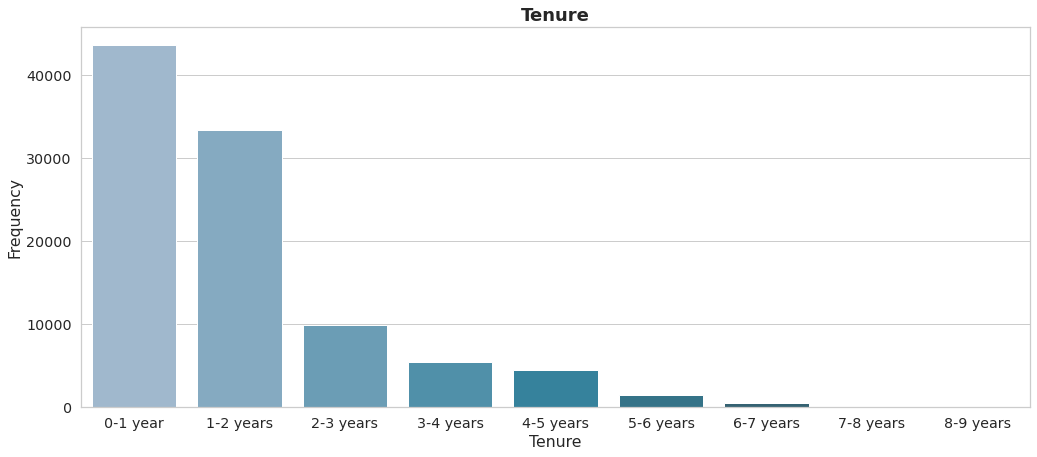

In [ ]:
plt.figure(figsize=(17,7))
sns.countplot('year_group',data = facebook_df, order = facebook_df['year_group'].value_counts().index,palette="PuBuGn_d")
plt.title("Tenure",fontsize=18,fontweight="bold")
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

**Majority of the users are 0 to 2 years old**

<a id=section33></a>
### 5.3.2 Analysis based on Tenure and Gender

Text(0, 0.5, 'Total Users')

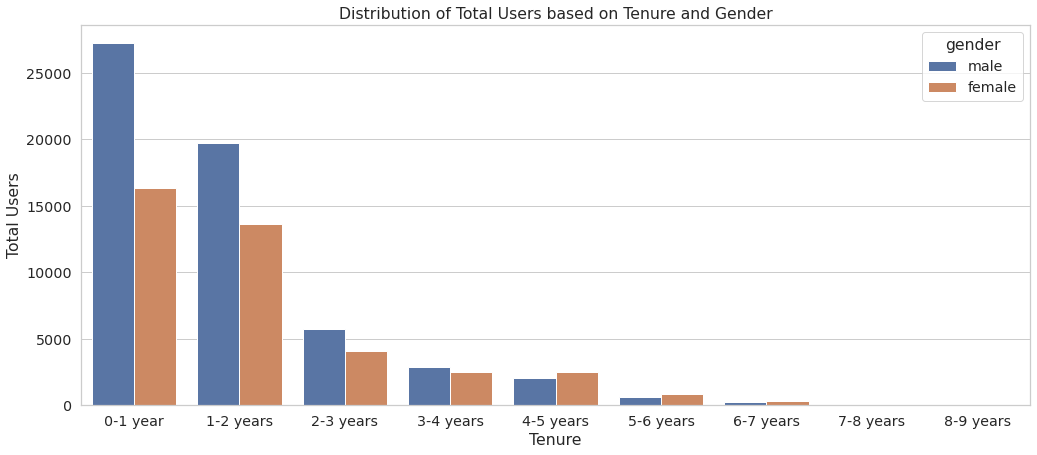

In [ ]:
fig,ax =plt.subplots(figsize=(17,7))
sns.countplot(data = facebook_df,x = 'year_group', hue='gender')
plt.title('Distribution of Total Users based on Tenure and Gender')
plt.xlabel('Tenure')
plt.ylabel('Total Users')

**Retention ratio of male users is very less**

<a id=section34></a>
### 5.3.3 Analysis based on Distribution of Users Age Group against Tenure

Text(0, 0.5, 'Tenure')

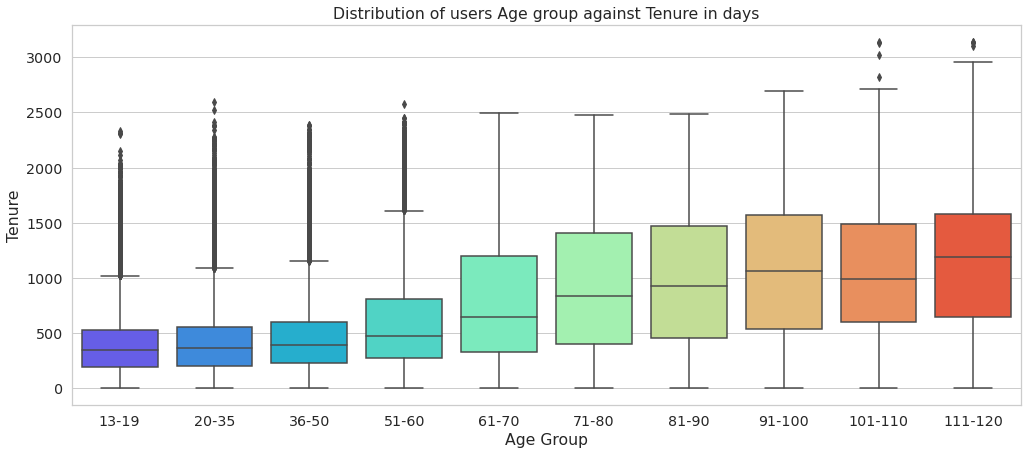

In [ ]:
plt.figure(figsize=(17,7))
sns.boxplot(data=facebook_df, x='age_group', y='tenure', palette='rainbow')

plt.title('Distribution of users Age group against Tenure in days')
plt.xlabel('Age Group')
plt.ylabel('Tenure')

**Tenure of users has an increasing trend with increase in age**

<a id=section35></a>
### 5.3.4 Analysis based on Distribution of Genderwise Age Group against Tenure

Text(0, 0.5, 'Tenure')

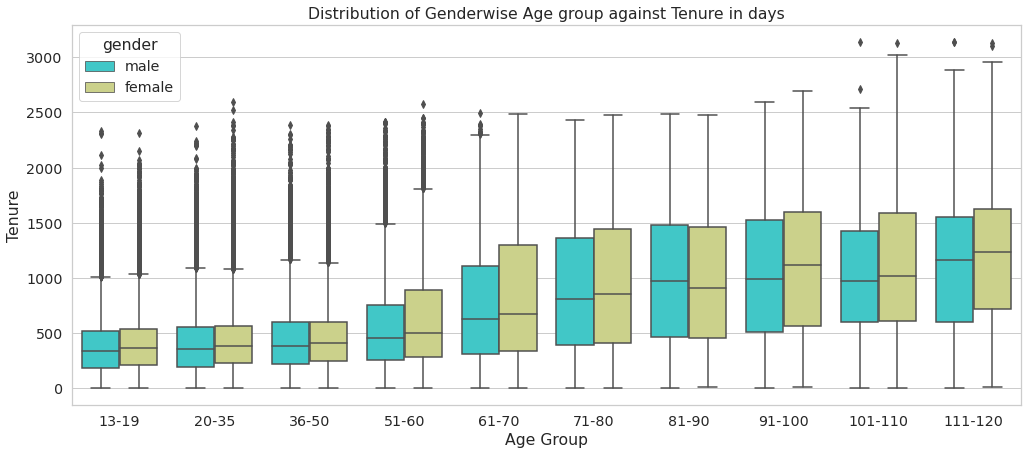

In [ ]:
plt.figure(figsize=(17,7))
sns.boxplot(data=facebook_df, x='age_group', y='tenure', hue='gender', palette='rainbow')

plt.title('Distribution of Genderwise Age group against Tenure in days')
plt.xlabel('Age Group')
plt.ylabel('Tenure')

**Tenure of users has an increasing trend with increase in age across both genders.**

<a id=section36></a>
## 5.4 Analysis based on Age Group and Facebook Like given

Text(0, 0.5, 'Total Likes Given')

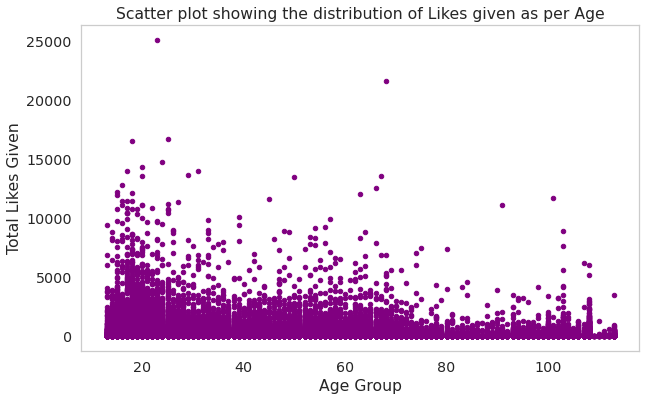

In [ ]:
facebook_df.plot(kind='scatter', x='age', y='likes', figsize=(10, 6), color='purple', grid=False)
plt.title('Scatter plot showing the distribution of Likes given as per Age')
plt.xlabel('Age Group')
plt.ylabel('Total Likes Given')


**Spike in likes given post the age of 80 years is due to few outliers.**

Text(0, 0.5, 'Total Likes Received')

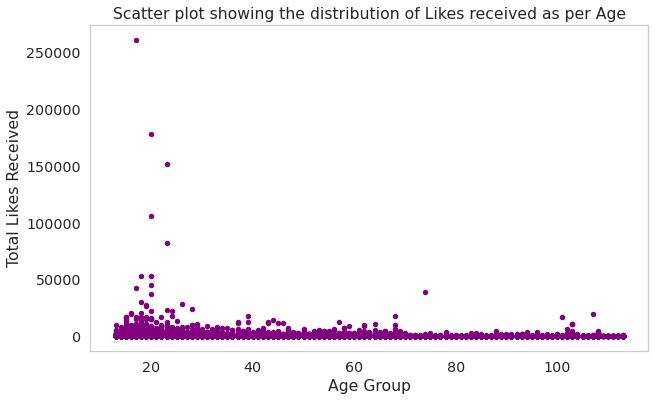

In [ ]:
facebook_df.plot(kind='scatter', x='age', y='likes_received', figsize=(10, 6), color='purple', grid=False)
plt.title('Scatter plot showing the distribution of Likes received as per Age')
plt.xlabel('Age Group')
plt.ylabel('Total Likes Received')

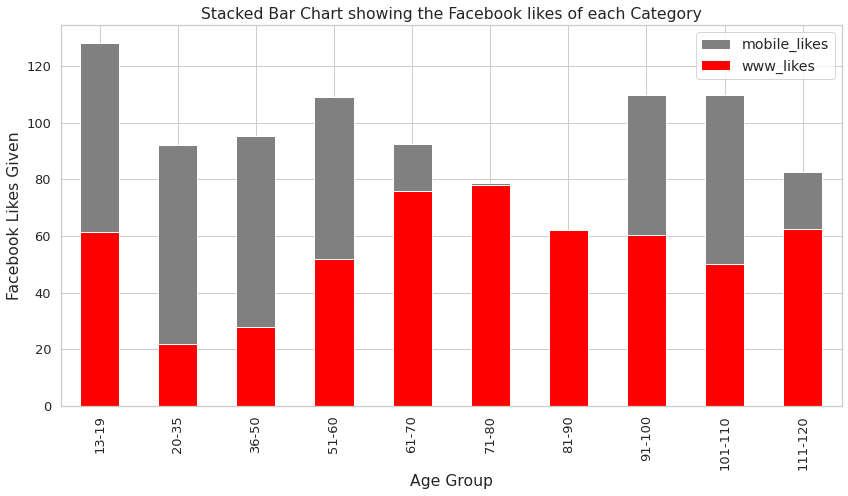

In [ ]:
facebook_df.groupby(['age_group'])['mobile_likes'].mean().plot(kind='bar', figsize=(14, 7), color='grey')
facebook_df.groupby(['age_group'])['www_likes'].mean().plot(kind='bar', figsize=(14, 7), color='red', fontsize=13)

plt.xlabel('Age Group')
plt.ylabel('Facebook Likes Given')
plt.title('Stacked Bar Chart showing the Facebook likes of each Category')
plt.legend(labels=('mobile_likes', 'www_likes'))

**While mobile is used frequently by young users, the mobile usage for giving likes decreases between age group 60 to 90 years.**

<a id=section37></a>
## 5.5 Analysis based on Age Group and Like Received on Facebook

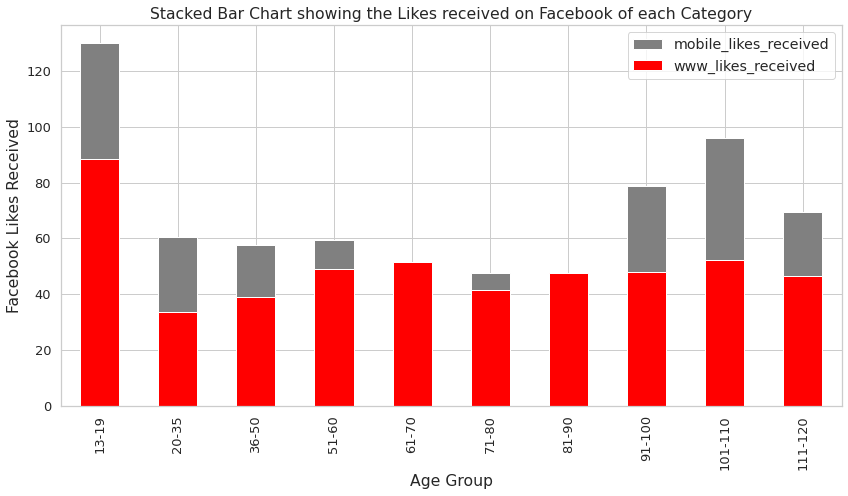

In [ ]:
facebook_df.groupby(['age_group'])['mobile_likes_received'].mean().plot(kind='bar', figsize=(14, 7), color='grey')
facebook_df.groupby(['age_group'])['www_likes_received'].mean().plot(kind='bar', figsize=(14, 7), color='red', fontsize=13)

plt.xlabel('Age Group')
plt.ylabel('Facebook Likes Received')
plt.title('Stacked Bar Chart showing the Likes received on Facebook of each Category')
plt.legend(labels=('mobile_likes_received', 'www_likes_received'))

**The ratio of mobile likes received to that through webpage decreases as the age increases, until the age of 90 years.**

<a id=section38></a>
## 5.6 Distribution of Likes given as per Age

####Bivariate line chart for Likes given and Likes received through Mobile and Facebook Website

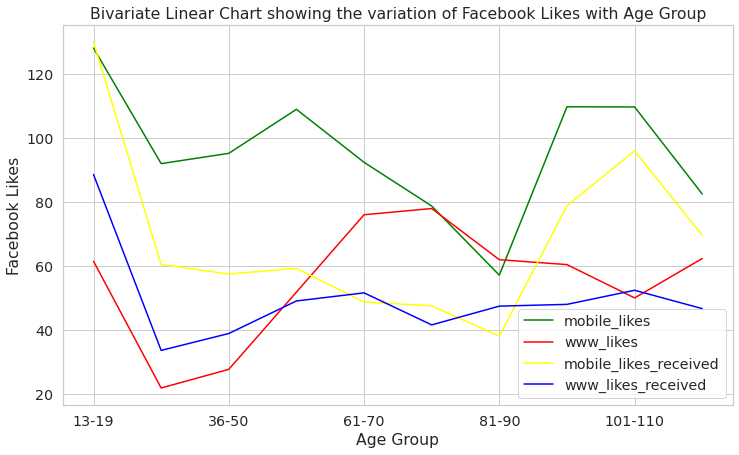

In [ ]:
facebook_df.groupby(['age_group'])['mobile_likes'].mean().plot(kind='line', figsize=(12, 7), color='green')
facebook_df.groupby(['age_group'])['www_likes'].mean().plot(kind='line', figsize=(12, 7), color='red')
facebook_df.groupby(['age_group'])['mobile_likes_received'].mean().plot(kind='line', figsize=(12, 7), color='yellow')
facebook_df.groupby(['age_group'])['www_likes_received'].mean().plot(kind='line', figsize=(12, 7), color='blue')
plt.xlabel('Age Group')
plt.ylabel('Facebook Likes')
plt.title('Bivariate Linear Chart showing the variation of Facebook Likes with Age Group')
plt.legend(['mobile_likes', 'www_likes', 'mobile_likes_received',  'www_likes_received'])

**Increasing trend observed in giving and receiving likes between age groups 36 to 80 years. However, this trend is not true for likes received through mobile.
Spike in likes through mobile observed post the age of 80 years.**

<a id=section39></a>
## 5.7 Distribution of Likes Received as per Tenure

Text(0, 0.5, 'Total Likes Given')

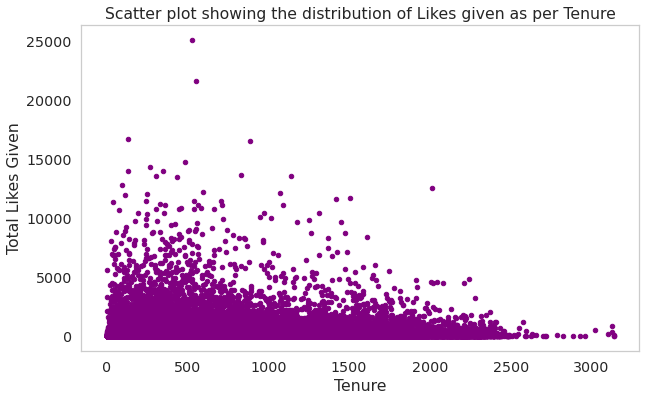

In [ ]:
facebook_df.plot(kind='scatter', x='tenure', y='likes', figsize=(10, 6), color='purple', grid=False)
plt.title('Scatter plot showing the distribution of Likes given as per Tenure')
plt.xlabel('Tenure')
plt.ylabel('Total Likes Given')

Text(0, 0.5, 'Total Likes Received')

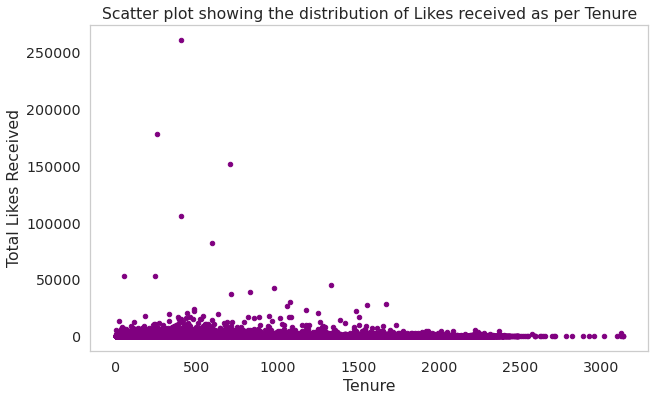

In [ ]:
facebook_df.plot(kind='scatter', x='tenure', y='likes_received', figsize=(10, 6), color='purple', grid=False)
plt.title('Scatter plot showing the distribution of Likes received as per Tenure')
plt.xlabel('Tenure')
plt.ylabel('Total Likes Received')

####Bivariate line chart for Likes given and Likes received through Mobile and Facebook Website

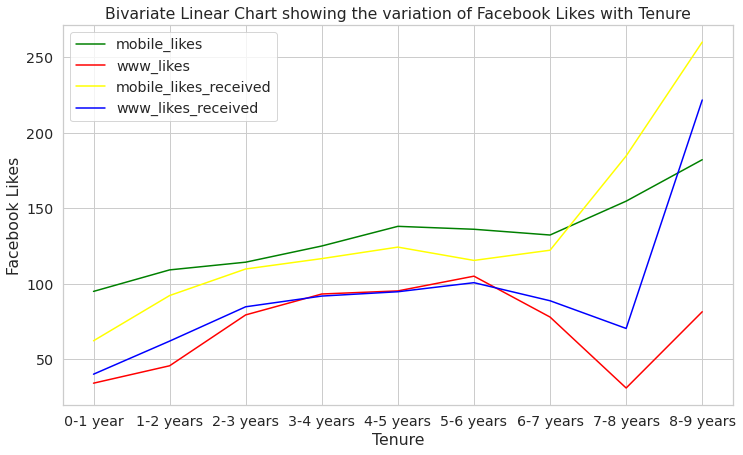

In [ ]:
facebook_df.groupby(['year_group'])['mobile_likes'].mean().plot(kind='line', figsize=(12, 7), color='green')
facebook_df.groupby(['year_group'])['www_likes'].mean().plot(kind='line', figsize=(12, 7), color='red')
facebook_df.groupby(['year_group'])['mobile_likes_received'].mean().plot(kind='line', figsize=(12, 7), color='yellow')
facebook_df.groupby(['year_group'])['www_likes_received'].mean().plot(kind='line', figsize=(12, 7), color='blue')

plt.ylabel('Facebook Likes')
plt.xlabel('Tenure')
plt.title('Bivariate Linear Chart showing the variation of Facebook Likes with Tenure')
plt.legend(['mobile_likes', 'www_likes', 'mobile_likes_received',  'www_likes_received'])

<a id=section40></a>
##5.8 Auto-correlation of variable

#### Create a copy of "facebook_df" dataframe for Label encoding

In [ ]:
facebook_new = facebook_df.copy(deep=True)        

We know that machine understands only numbers, unlike human brain it is inefficient to categorize strings.
The solution that tackles this problem is encoding the categorical data,
"Encoding" helps machine understand the meaning behind the features.

One such encoding technique is "Label Encoding".

"Label Encoding" works on a very simple approach of assigning integers to categories in the features.
Integers are assigned on the basis of acending order of the characters in the categories.
for example:
if we have three categories namely red, blue and green. Then after encoding them with LabelEncoder we get
red as 2, blue as 0 and green as 1.

In [ ]:
from sklearn.preprocessing import LabelEncoder                                    # Label encoder is used to transform non-numerical labels to numerical labels.
number = LabelEncoder()                                                           # Here as our data set consists only of categorical values except age
for i in facebook_new.columns:                                                          # in order to find the correlation between variables, we do Label encoding 
    facebook_new[i] = number.fit_transform(facebook_new[i].astype('str'))

In [ ]:
number.fit(['male', 'female'])

LabelEncoder()

In [ ]:
number.transform(['male', 'female'])

array([1, 0])

In [ ]:
number.inverse_transform([0, 1])

array(['female', 'male'], dtype='<U6')

In [ ]:
facebook_new.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group
0,90618,15,10,99,2,1,1591,0,0,0,0,0,0,0,0,2,0
1,15808,15,11,99,2,0,1974,0,0,0,0,0,0,0,0,2,0
2,89746,15,7,99,2,1,335,0,0,0,0,0,0,0,0,2,0
3,16690,15,17,99,3,0,2341,0,0,0,0,0,0,0,0,2,0
4,60704,15,25,99,3,1,2219,0,0,0,0,0,0,0,0,2,0


### Correlation of Features

In [ ]:
corr=facebook_new.corr()['gender']
corr[np.argsort(corr,axis=0)[::-1]]

gender                   1.00
dob_year                 0.08
tenure                   0.02
userid                  -0.00
friendships_initiated   -0.02
friend_count            -0.03
dob_day                 -0.03
dob_month               -0.04
year_group              -0.09
age                     -0.10
age_group               -0.11
mobile_likes            -0.14
www_likes               -0.14
likes                   -0.14
likes_received          -0.15
mobile_likes_received   -0.17
www_likes_received      -0.19
Name: gender, dtype: float64

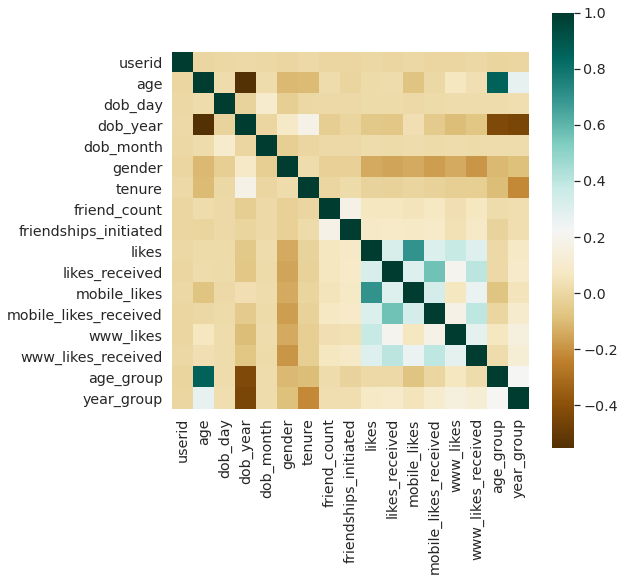

In [ ]:
features_correlation = facebook_new.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='BrBG')
plt.show()

#### Observation
* Friend Count and Friendship initiated are correlated to each other.
* Likes given and received are correlated to each other.
* Mobile likes given and received are correlated to each other.
* Webpage likes given and received are correlated to each other.

<a id=section41></a>
# 6. Conclusion
* While there are more male user accounts, female users (especially till 20 years) seem to be more active on facebook
* Users have a tendency of using facebook over mobile at younger age and over webpage as age grows
* Increase in activities observed in age group between 51 to 80 years
* More male user accounts become inactive as the tenure grows

<a id=section42></a>
# 7. Actionable Insight
* Market more female oriented products
* Market more products, educational material for children and teenagers
* User Interface of facebook can be more mobile friendly so that more users can use it on mobile phones
* Monitor activities of users between age group of 51 to 80 years and market products accordingly
* Some schemes (long term association points: redeemable against purchasing some product) can be introduced to increase the retention ratio of users (especially male users)